# Identifying Low-Risk Aircraft for Expansion into Aviation Business

## Data Presentation

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
# Using "latin1" encoding to handle special characters
# Setting low_memory to False to avoid DtypeWarning for mixed types in columns (Column 6,7,28)

aviation_data =pd.read_csv(r"C:\Users\A808865\Desktop\moringa\Project Phase 1\Data Sets\AviationData.csv", encoding='latin1', low_memory=False)

# Displaying the first few rows of the dataset to understand its structure

aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


###### Cleaning up Columns

In [4]:
# Shape of the dataset - Displaying the number of rows and columns
print("Shape of the dataset:", aviation_data.shape)


Shape of the dataset: (88889, 31)


In [5]:
# Quick summary of data types and non-null values
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Checking Missing Values 

aviation_data.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

In [7]:
# Replacing period (".") in column names with underscores(_) to avoid syntax issues and ensure consistency

aviation_data.columns = aviation_data.columns.str.replace('.', '_')
aviation_data.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [8]:
# Dropping Columns we wont be needing for analysis and they also have lots of missing values


aviation_data=aviation_data.drop(['Schedule', 'Air_carrier' ,'FAR_Description', 'Longitude', 'Latitude', 'Airport_Code', 'Airport_Name'], axis=1)
aviation_data.head()


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
# Convert event_date column to datetime format
aviation_data['Event_Date'] = pd.to_datetime(aviation_data['Event_Date'])


# Extracting the year from the event_date column and creating a new column "Year"
aviation_data['Year'] = aviation_data['Event_Date'].dt.year
aviation_data.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


In [10]:

# Checking the data types of the columns

print(aviation_data.dtypes)

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Injury_Severity                   object
Aircraft_damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
Purpose_of_flight                 object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Weather_Condition                 object
Broad_phase_of_flight             object
Report_Status                     object
Publication_Date                  object
Year            

In [11]:
# Summary Statistics of the dataset
aviation_data.describe(include='all')

<ipython-input-11-60f5219a4651>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aviation_data.describe(include='all')


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
count,88889,88889,88889,88889,88837,88663,87889,85695,32287,87572,...,82697,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82508,75118,88889.000000
unique,87951,2,88863,14782,27758,219,109,4,15,79105,...,26,NaN,NaN,NaN,NaN,4,12,17075,2924,NaN
top,20001212X19172,Accident,WPR22LA201,1982-05-16 00:00:00,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Airplane,NONE,...,Personal,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020,NaN
freq,3,85015,2,25,434,82248,67357,64148,27617,344,...,49448,NaN,NaN,NaN,NaN,77303,15428,61754,17019,NaN
first,NaN,NaN,NaN,1948-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN,1999.206662
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN,11.888226
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1948.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1989.000000


# Data Analysis

### Understanding Aircraft


###### Using Registration_number to track how many times each aircraft has appeared in multiple incident

######  If a plane shows up multiple times, it may have been involved in multiple accidents/incidents — indicating risk.

In [12]:
# Number of times each aircraft registration has appeared

aircraft_counts = aviation_data['Registration_Number'].value_counts()

# Filtering & Displaying only those with more than 1 occurrence (multiple incidents)

multiple_incidents = aircraft_counts[aircraft_counts > 1]

multiple_incidents


NONE      344
UNREG     126
None       65
UNK        13
USAF        9
         ... 
N232E       2
N53264      2
N4079R      2
N3129       2
N180SR      2
Name: Registration_Number, Length: 7053, dtype: int64

In [18]:


# Creating a new column 'incident_count' in the original dataframe
aviation_data['incident_count'] = aviation_data['Registration_Number'].map(aircraft_counts)

#  Classify risk into Low, Medium, High based on the number of incidents (Registration_Number)

def classify_risk(count):
    if pd.isna(count) or count <= 10:
        return 'Low Risk'
    else:
        return 'High Risk'

aviation_data['multiple_incident_risk'] = aviation_data['incident_count'].apply(classify_risk)
aviation_data.tail(10)


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,incident_count,multiple_incident_risk,aircraft_damage_risk
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,N393HA,...,0.0,0.0,NaN,NaN,NaN,NaN,2022,2.0,Low Risk,Unknown Risk
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,non-fatal,NaN,NaN,N4144P,...,0.0,3.0,NaN,NaN,NaN,20-12-2022,2022,2.0,Low Risk,Unknown Risk
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,minor,NaN,NaN,N8786U,...,0.0,0.0,NaN,NaN,NaN,22-12-2022,2022,1.0,Low Risk,Unknown Risk
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,minor,NaN,NaN,N321GD,...,0.0,1.0,NaN,NaN,NaN,27-12-2022,2022,1.0,Low Risk,Unknown Risk
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,fatal,NaN,NaN,PP-IRC,...,0.0,0.0,NaN,NaN,NaN,28-12-2022,2022,1.0,Low Risk,Unknown Risk
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,minor,NaN,NaN,N1867H,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,1.0,Low Risk,Unknown Risk
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,NaN,NaN,NaN,NaN,2022,1.0,Low Risk,Unknown Risk
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,non-fatal,substantial,Airplane,N749PJ,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,1.0,Low Risk,Low Risk
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,NaN,NaN,NaN,NaN,2022,1.0,Low Risk,Unknown Risk
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,minor,NaN,NaN,N9026P,...,0.0,1.0,NaN,NaN,NaN,30-12-2022,2022,1.0,Low Risk,Unknown Risk


###### I've introduced a multiple incident risk classification based on the frequency of repeated incidents associated with each aircraft's registration number in the dataset,

###### Most aircraft had only one incident, a few had 2 to 7, and one aircraft had as many as 185 recorded incidents. Using these observations, I defined a new column, multiple_incident_risk, with the following categories:

###### Low Risk: Aircraft with less than 10 recorded incident

###### High Risk: Aircraft with more than 10 incidents

###### This classification helps us identify potentially problematic aircraft for further scrutiny in our analysis of low-risk aircraft for commercial and private enterprise expansion.



##### Standardizing Key risk Columns

In [14]:
# Replacing blank or unknowns with NaN
aviation_data.replace(['UNK', 'Unknown', '', ' '], pd.NA, inplace=True)

# Cleaning up inconsistent categories
aviation_data['Aircraft_damage'] = aviation_data['Aircraft_damage'].str.lower().str.strip()

aviation_data['Weather_Condition'] = aviation_data['Weather_Condition'].str.upper().str.strip()

aviation_data['Injury_Severity'] = aviation_data['Injury_Severity'].str.lower().str.strip()

aviation_data


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,incident_count,multiple_incident_risk
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,fatal(2),destroyed,NaN,NC6404,...,0.0,0.0,0.0,<NA>,Cruise,Probable Cause,NaN,1948,1.0,Low Risk
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,fatal(4),destroyed,NaN,N5069P,...,0.0,0.0,0.0,<NA>,<NA>,Probable Cause,19-09-1996,1962,1.0,Low Risk
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,fatal(3),destroyed,NaN,N5142R,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,1.0,Low Risk
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,fatal(2),destroyed,NaN,N1168J,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,1.0,Low Risk
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,fatal(1),destroyed,NaN,N15NY,...,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,1.0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,minor,NaN,NaN,N1867H,...,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,1.0,Low Risk
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,1.0,Low Risk
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,non-fatal,substantial,Airplane,N749PJ,...,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,1.0,Low Risk
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,1.0,Low Risk


#####  Assess the potential risk each aircraft poses in terms of safety, reliability, and maintenance (Aircraft Damage)
###### Assigning low risk and medium risk

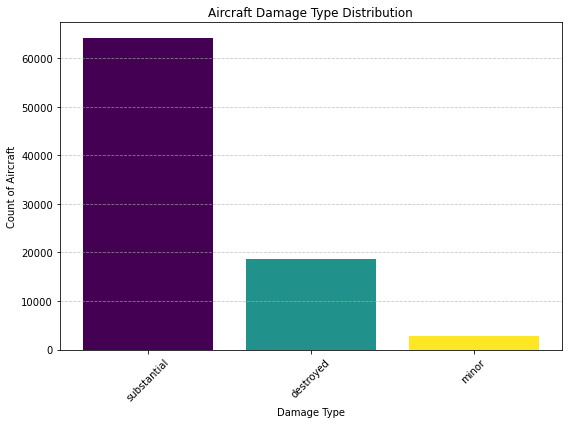

In [15]:
import matplotlib.pyplot as plt

# occurrences of each unique Aircraft Damage type
damage_counts = aviation_data['Aircraft_damage'].value_counts()

# Create a color array using the 'viridis' colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(damage_counts)))

# Plotting bar chart with colormap
plt.figure(figsize=(8, 6))
plt.bar(damage_counts.index, damage_counts.values, color=colors)

plt.title('Aircraft Damage Type Distribution')
plt.xlabel('Damage Type')
plt.ylabel('Count of Aircraft')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
# Classifying Aircraft Damage Risk based on the 'Aircraft_damage' column

def classify_risk(row):
    if pd.isna(row['Aircraft_damage']):
        return 'Unknown Risk'  # Handle missing values
    elif (row['Aircraft_damage'] == 'Destroyed') or (row['Aircraft_damage'] == 'Substantial'):
        return 'High Risk'
    else:
        return 'Low Risk'

# creating new column for Aircraft damage Risk Classification  
aviation_data['aircraft_damage_risk'] = aviation_data.apply(classify_risk, axis=1)
aviation_data.head(10)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,incident_count,multiple_incident_risk,aircraft_damage_risk
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,fatal(2),destroyed,NaN,NC6404,...,0.0,0.0,<NA>,Cruise,Probable Cause,NaN,1948,1.0,Low Risk,Low Risk
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,fatal(4),destroyed,NaN,N5069P,...,0.0,0.0,<NA>,<NA>,Probable Cause,19-09-1996,1962,1.0,Low Risk,Low Risk
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,fatal(3),destroyed,NaN,N5142R,...,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,1.0,Low Risk,Low Risk
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,fatal(2),destroyed,NaN,N1168J,...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,1.0,Low Risk,Low Risk
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,fatal(1),destroyed,NaN,N15NY,...,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,1.0,Low Risk,Low Risk
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,non-fatal,substantial,Airplane,CF-TLU,...,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,1.0,Low Risk,Low Risk
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,fatal(4),destroyed,NaN,N4988E,...,0.0,0.0,IMC,<NA>,Probable Cause,06-11-2001,1981,1.0,Low Risk,Low Risk
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,non-fatal,substantial,Airplane,N2482N,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,1.0,Low Risk,Low Risk
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,non-fatal,substantial,Airplane,N7967Q,...,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,1.0,Low Risk,Low Risk
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,non-fatal,substantial,NaN,N3906K,...,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,1.0,Low Risk,Low Risk
